# Klasyfikacja na danych numerycznych

In [1]:
from IPython.display import display
import pandas as pd

from ium_long_stay_patterns.src.helpers.create_numerical_dataset import create_numerical_dataset, merge_with_stats
from ium_long_stay_patterns.config import ProcessedCSV
from models.binary import BinaryClassifier
from models.naive import NaiveZeroClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from ium_long_stay_patterns.modeling.train import Trainer

from ium_long_stay_patterns.src.helpers.plotting import plot_confusion_matrix

from ium_long_stay_patterns.src.helpers.data_loaders import prepare_and_create_loaders

from ium_long_stay_patterns.config import SAVED_MODELS_DIR, TEST_DATA_DIR

import joblib

2026-01-03 20:53:19.365 | INFO     | ium_long_stay_patterns.config:<module>:12 - PROJ_ROOT path is: /home/matimat/IUM/ium-long-stay-patterns


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [3]:
df_numeric = create_numerical_dataset(ProcessedCSV.LISTINGS.path, strategy=True)
df_final = merge_with_stats(df_numeric, with_ids=True)

# Podział na cechy (X) i etykietę (y)
# Usuwamy 'id' oraz nasz cel 'target' z cech wejściowych
X = df_final.drop(columns=['target'])
y = df_final['target']

In [4]:
# save targets=1 for testing
import json
import numpy as np
import pandas as pd

sel = df_final[df_final['target'] == 1].drop(columns=['target']).head(5)

def _convert(val):
    if pd.isna(val):
        return None
    if isinstance(val, (np.integer,)):
        return int(val)
    if isinstance(val, (np.floating,)):
        return float(val)
    if isinstance(val, (np.bool_,)):
        return bool(val)
    if isinstance(val, np.ndarray):
        return val.tolist()
    return val

records = [{k: _convert(v) for k, v in row.items()} for row in sel.to_dict(orient='records')]
file_path = TEST_DATA_DIR / "test_targets_1.json"
with open(file_path, "w", encoding="utf-8") as f:
    json.dump(records, f, indent=2, ensure_ascii=False)

print(f"Successfully saved {len(records)} records to {file_path}")

Successfully saved 5 records to /home/matimat/IUM/ium-long-stay-patterns/prediction_service/test_data/test_targets_1.json


In [4]:
train_loader, val_loader, test_loader, fitted_scaler = prepare_and_create_loaders(X, y)


Train set size: 875 (239.0 positive)
Validation set size: 219 (60.0 positive)
Test set size: 274
Features: 18
Total positive samples in train set: 239.0


In [ ]:
# save scaller

joblib.dump(fitted_scaler, SAVED_MODELS_DIR / "scaler.joblib")

In [20]:
data_iter = iter(train_loader)
images, labels = next(data_iter)
input_dim = images.shape[1]

model = BinaryClassifier(input_dim).to(device)


In [21]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

trainer = Trainer(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    epochs=100
)


In [7]:
trainer.train(train_loader, val_loader)

2025-12-29 21:28:34.682 | INFO     | ium_long_stay_patterns.modeling.train:train:19 - Training started on device: cpu


2025-12-29 21:28:34.741 | INFO     | ium_long_stay_patterns.modeling.train:train:47 - Epoch 001 | Avg Loss: 0.6186 | AUC: 0.6634 | F1: 0.0000 | P: 0.0000 | R: 0.0000


2025-12-29 21:28:35.124 | INFO     | ium_long_stay_patterns.modeling.train:train:47 - Epoch 010 | Avg Loss: 0.4173 | AUC: 0.8257 | F1: 0.4375 | P: 0.5833 | R: 0.3500


2025-12-29 21:28:35.595 | INFO     | ium_long_stay_patterns.modeling.train:train:47 - Epoch 020 | Avg Loss: 0.3536 | AUC: 0.8543 | F1: 0.4330 | P: 0.5676 | R: 0.3500


2025-12-29 21:28:36.095 | INFO     | ium_long_stay_patterns.modeling.train:train:47 - Epoch 030 | Avg Loss: 0.3051 | AUC: 0.8605 | F1: 0.5253 | P: 0.6667 | R: 0.4333


2025-12-29 21:28:36.596 | INFO     | ium_long_stay_patterns.modeling.train:train:47 - Epoch 040 | Avg Loss: 0.2493 | AUC: 0.8723 | F1: 0.5049 | P: 0.6047 | R: 0.4333


2025-12-29 21:28:37.036 | INFO     | ium_long_stay_patterns.modeling.train:train:47 - Epoch 050 | Avg Loss: 0.1972 | AUC: 0.8892 | F1: 0.7049 | P: 0.6935 | R: 0.7167


2025-12-29 21:28:37.499 | INFO     | ium_long_stay_patterns.modeling.train:train:47 - Epoch 060 | Avg Loss: 0.1481 | AUC: 0.9069 | F1: 0.6949 | P: 0.7069 | R: 0.6833


2025-12-29 21:28:38.065 | INFO     | ium_long_stay_patterns.modeling.train:train:47 - Epoch 070 | Avg Loss: 0.1080 | AUC: 0.9058 | F1: 0.6549 | P: 0.6981 | R: 0.6167


2025-12-29 21:28:38.587 | INFO     | ium_long_stay_patterns.modeling.train:train:47 - Epoch 080 | Avg Loss: 0.0722 | AUC: 0.9067 | F1: 0.6607 | P: 0.7115 | R: 0.6167


2025-12-29 21:28:39.038 | INFO     | ium_long_stay_patterns.modeling.train:train:47 - Epoch 090 | Avg Loss: 0.0515 | AUC: 0.9070 | F1: 0.6842 | P: 0.7222 | R: 0.6500


2025-12-29 21:28:39.527 | INFO     | ium_long_stay_patterns.modeling.train:train:47 - Epoch 100 | Avg Loss: 0.0369 | AUC: 0.9066 | F1: 0.6667 | P: 0.7255 | R: 0.6167


In [8]:
test_metrics = trainer._validate(test_loader)
print(f"Final Test ROC AUC: {test_metrics['auc']:.4f}")
print(f"Final Test F1-Score: {test_metrics['f1']:.4f}")



Final Test ROC AUC: 0.8751
Final Test F1-Score: 0.6846


F1-score jest wieksze niz założone w analitycznym kryterium

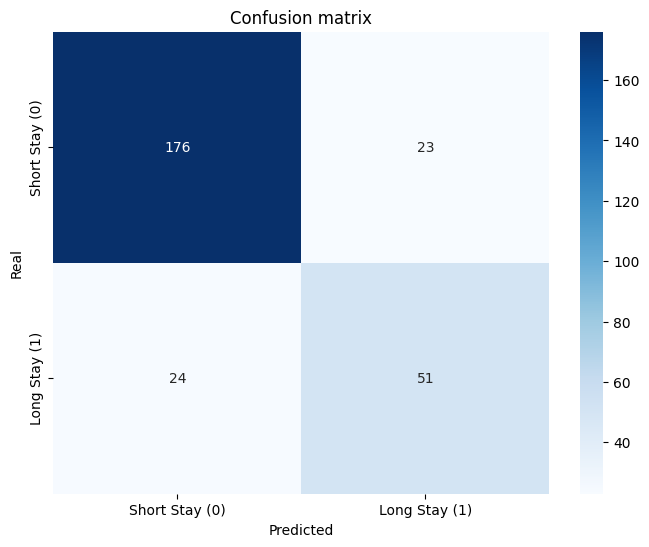


Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       199
         1.0       0.69      0.68      0.68        75

    accuracy                           0.83       274
   macro avg       0.78      0.78      0.78       274
weighted avg       0.83      0.83      0.83       274



In [ ]:
trainer.model.eval()
all_preds = []
all_true = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = trainer.model(batch_X.to(trainer.device))
        preds = (outputs > 0.5).float()
        all_preds.extend(preds.cpu().numpy())
        all_true.extend(batch_y.numpy())

plot_confusion_matrix(np.array(all_true), np.array(all_preds))

In [10]:
trainer.save_model(SAVED_MODELS_DIR / "binary_classifier_model.pth")

2025-12-29 21:28:39.761 | INFO     | ium_long_stay_patterns.modeling.train:save_model:81 - Model saved to /home/mateusz/IUM/ium-long-stay-patterns/saved_models/binary_classifier_model.pth


# Model Naiwny

In [11]:
naive_model = NaiveZeroClassifier()

In [12]:
naive_trainer = Trainer(model=naive_model, criterion=None, optimizer=None)
naive_metrics = naive_trainer._validate(test_loader)

In [13]:
print(f"Final Test ROC AUC: {naive_metrics['auc']:.4f}")
print(f"Final Test F1-Score: {naive_metrics['f1']:.4f}")
print(f"Precision: {naive_metrics['precision']:.4f}")
print(f"Recall:    {naive_metrics['recall']:.4f}")

Final Test ROC AUC: 0.5000
Final Test F1-Score: 0.0000
Precision: 0.0000
Recall:    0.0000


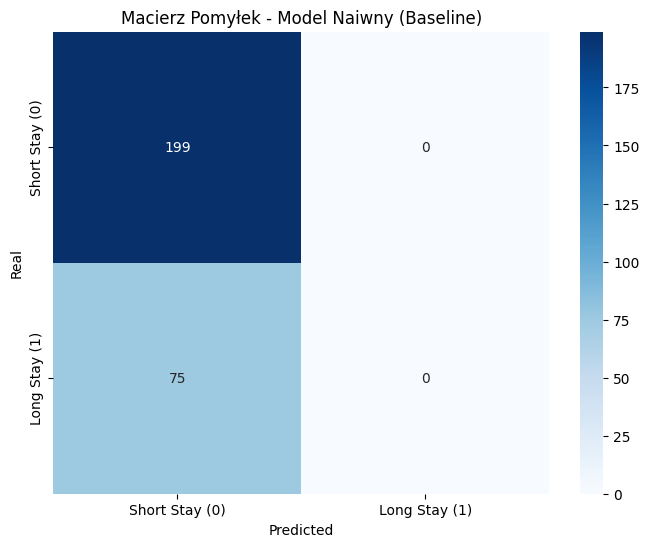


Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84       199
         1.0       0.00      0.00      0.00        75

    accuracy                           0.73       274
   macro avg       0.36      0.50      0.42       274
weighted avg       0.53      0.73      0.61       274



/home/mateusz/IUM/ium-long-stay-patterns/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mateusz/IUM/ium-long-stay-patterns/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mateusz/IUM/ium-long-stay-patterns/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [14]:
all_true = []
all_preds = []

naive_model.eval()
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = naive_model(batch_X)
        all_preds.extend(outputs.cpu().numpy())
        all_true.extend(batch_y.numpy())

# Rysowanie macierzy
plot_confusion_matrix(
    np.array(all_true),
    np.array(all_preds),
    title='Macierz Pomyłek - Model Naiwny (Baseline)'
)

In [15]:
trainer.save_model(SAVED_MODELS_DIR / "naive_classifier_model.pth")

2025-12-29 21:29:45.646 | INFO     | ium_long_stay_patterns.modeling.train:save_model:81 - Model saved to /home/mateusz/IUM/ium-long-stay-patterns/saved_models/naive_classifier_model.pth
